## Homework: Network Visualization using networkx
## Author: Sangyu Shen


In [1]:
import plotly.plotly as py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import csv
import plotly.graph_objs as go
from plotly.graph_objs import *

# 1. Create and visualize a graph 

In [2]:
G = nx.Graph()

In [3]:
G.add_edges_from([(1, 2), (1, 3),(2,3)])
G.add_node(4)

In [4]:
G.add_nodes_from([6,7])
G.add_edges_from([(6,7),(7,4),(4,2),(6,3)])

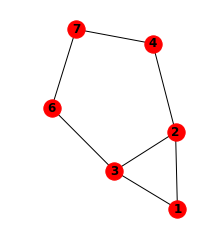

In [5]:
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In this plot, an undirected network was visualized. There are 7 nodes and 7 edges in this graph. It could be noticed that all of the nodes have 2 or more connections.

# 2. Visualize a graph generated from CSV files

In [6]:
path = 'polnet2017/Data/'
edges = 'Dataset1-Media-Example-EDGES.csv'
nodes = 'Dataset1-Media-Example-NODES.csv'

In [7]:
with open(path+nodes) as nodecsv:
    nodereader = csv.reader(nodecsv)
    nodes = [n for n in nodereader][1:]

In [8]:
node_names = [n[0] for n in nodes]

In [9]:
with open(path+edges) as edgecsv:
    edgereader = csv.reader(edgecsv)
    edges = [(e[0],e[1]) for e in edgereader][1:]

In [10]:
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)

In [11]:
pos=nx.fruchterman_reingold_layout(G) 

In [12]:
Xv=[pos[k][0] for k in node_names]
Yv=[pos[k][1] for k in node_names]
Xed=[]
Yed=[]
for edge in edges:
    Xed+=[pos[edge[0]][0],pos[edge[1]][0], None]
    Yed+=[pos[edge[0]][1],pos[edge[1]][1], None] 

In [13]:
trace3=go.Scatter(x=Xed,
               y=Yed,
               mode='lines',
               line=Line(color='rgb(210,210,210)', width=1),
               hoverinfo='none'
               )
trace4=go.Scatter(x=Xv,
               y=Yv,
               mode='markers',
               name='net',
               marker=Marker(symbol='dot',
                             size=5, 
                             color='#6959CD',
                             line=Line(color='rgb(50,50,50)', width=0.5)
                             ),
               text=node_names,
               hoverinfo='text'
               )

layout2 = go.Layout(title = "Network Graph",
                   titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False))

In [14]:
fig2 = dict(data=[trace3, trace4], layout=layout2)

py.iplot(fig2)

In this graph, a network was visualized based on the data from the csv file. If you hover the mouse, the label of the nodes would be showed. From this graph it could be found that node S3 was the center of this network, which had 8 direct connections in this network.